In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [2]:
def v_source_func(omega = 1, A = 1, phi = 0):
    """
    Defines the source voltage function as a sinusoidal wave changing with respect to time
    Parameters:
        t: Single value representing time, or array of time steps
        A: Amplitude of the sine wave, assumed equal to 1
        phi: Phase shift of the wave, assumed equal to 0
    Returns:
        The function of a standard sine wave A*sin(w*t+phi) with the given parameters
    """
    def v_source(t, omega = omega, A = A, phi = phi):
        return A * np.sin(omega * t + phi)
    
    return v_source

In [25]:
def make_system():
    init = State(I = 0, V_C = 0)
    
    t0 = 0
    t_end = 10
    
    return System(init=init, t0 = t0, t_end = t_end, 
                  v_s = v_source_func(omega = 60 * 2 * np.pi, A = 120, phi = 0), 
                  L = 0.03, R = 1000, C = 0.022)

In [26]:
def slope_function(state, t, system):
    I, V_C = state
    
    rectified_V_source = np.abs(system.v_s(t))
    
    i_load = V_C / system.R
    
    V_inductor = rectified_V_source - V_C
    
    if V_inductor > 0:
        dIdt = V_inductor / system.L
    else:
        dIdt = -V_C/system.L
    if I < 0 and dIdt < 0:
        dIdt = 0
        
    dVcdt = (I - i_load) / system.C
    
    return dIdt, dVcdt

In [27]:
system = make_system()

,values
init,I 0 V_C 0 dtype: int64
t0,0
t_end,10
v_s,<function v_source_func.<locals>.v_source at 0...
L,0.03
R,1000
C,0.022


In [28]:
slope_function(system.init, 1, system)

(1.72469884080689e-10, 0.0)

In [35]:
results, details = run_ode_solver(system, slope_function, max_step = 0.001)

In [36]:
results

,I,V_C
0.000000,0.000000,0.000000
0.000100,0.007539,0.000011
0.001051,0.822127,0.013163
0.002051,3.015569,0.095646
0.003051,6.270737,0.303460
0.004051,10.124703,0.674800
0.005051,14.028197,1.224578
0.006051,17.422768,1.942230
0.007051,19.819225,2.793094
0.008051,20.866366,3.723182


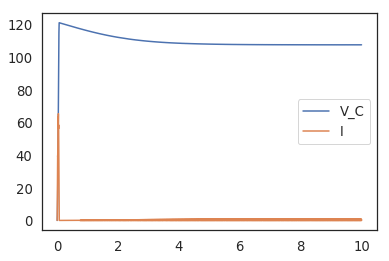

In [37]:
results.V_C.plot()
results.I.plot()
plt.legend(['V_C', 'I'])

In [32]:
%psource run_ode_solver